In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
  # train_seqs: 
  #     'MH_01_easy',
  #     'MH_05_difficult',
  #     'V2_01_easy',
  #     'V2_03_difficult',
  #     'MH_03_medium',
  #     'V1_02_medium',


In [3]:
# #Default imu sensor yaml file
# sensor_type: imu
# comment: VI-Sensor IMU (ADIS16448)

# # Sensor extrinsics wrt. the body-frame.
# T_BS:
#   cols: 4
#   rows: 4
#   data: [1.0, 0.0, 0.0, 0.0,
#          0.0, 1.0, 0.0, 0.0,
#          0.0, 0.0, 1.0, 0.0,
#          0.0, 0.0, 0.0, 1.0]
# rate_hz: 200

# # inertial sensor noise model parameters (static)
# gyroscope_noise_density: 1.6968e-04     # [ rad / s / sqrt(Hz) ]   ( gyro "white noise" )
# gyroscope_random_walk: 1.9393e-05       # [ rad / s^2 / sqrt(Hz) ] ( gyro bias diffusion )
# accelerometer_noise_density: 2.0000e-3  # [ m / s^2 / sqrt(Hz) ]   ( accel "white noise" )
# accelerometer_random_walk: 3.0000e-3    # [ m / s^3 / sqrt(Hz) ].  ( accel bias diffusion )
#/data/minje/euroc/Raw/MH_01_easy/mav0/imu0

In [4]:
file_paths = [
    '/data/minje/euroc/Raw/MH_01_easy/mav0/imu0/data.csv',
    '/data/minje/euroc/Raw/MH_05_difficult/mav0/imu0/data.csv',
    '/data/minje/euroc/Raw/V2_01_easy/mav0/imu0/data.csv',
    '/data/minje/euroc/Raw/V2_03_difficult/mav0/imu0/data.csv',
    '/data/minje/euroc/Raw/MH_03_medium/mav0/imu0/data.csv',
    '/data/minje/euroc/Raw/V1_02_medium/mav0/imu0/data.csv'
]

# 데이터를 저장할 리스트 정의
data_list = []

# 파일을 읽어서 데이터 리스트에 추가
for file_path in file_paths:
    with open(file_path, 'r') as file:
        data = list(csv.reader(file, delimiter=','))
        data = np.array(data[1:], dtype=np.float32)
        data_list.append(data)

In [5]:
print(" MH_01_easy : ", data_list[0].shape, "\n",
     "MH_05_difficult : ", data_list[1].shape, "\n",
     "V2_01_easy : ", data_list[2].shape, "\n",
     "V2_03_difficult : ", data_list[3].shape, "\n",
     "MH_03_medium : ", data_list[4].shape, "\n",
     "V1_02_medium : ", data_list[5].shape, "\n",)

 MH_01_easy :  (36820, 7) 
 MH_05_difficult :  (22721, 7) 
 V2_01_easy :  (22800, 7) 
 V2_03_difficult :  (23370, 7) 
 MH_03_medium :  (27008, 7) 
 V1_02_medium :  (17100, 7) 



In [6]:
gyro_list = []
acc_list = []

for i in range(len(data_list)):

    # angular velocity
    
    wx = data_list[i][:,1]
    wy = data_list[i][:,2]
    wz = data_list[i][:,3]
    gyro = np.array([wx, wy, wz])
    gyro_list.append(gyro)
    
    # linear accleration
    
    ax = data_list[i][:,4]
    ay = data_list[i][:,5]
    az = data_list[i][:,6]
    acc = np.array([ax, ay, az])
    acc_list.append(acc)
    

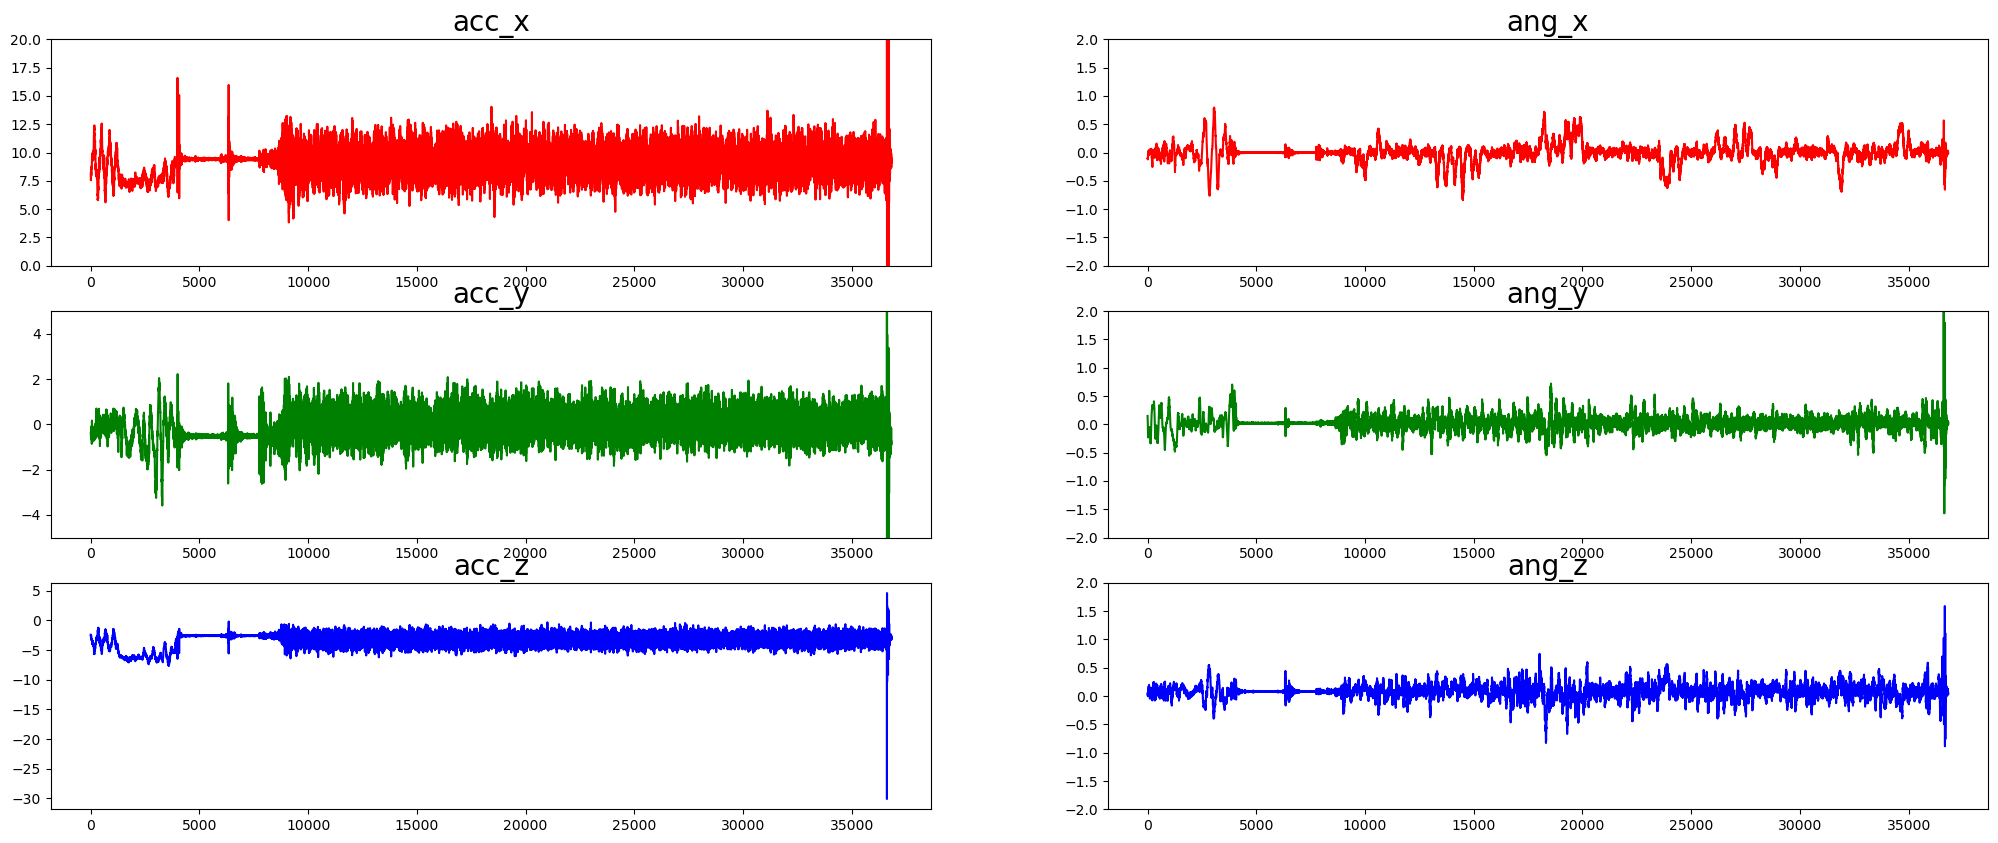

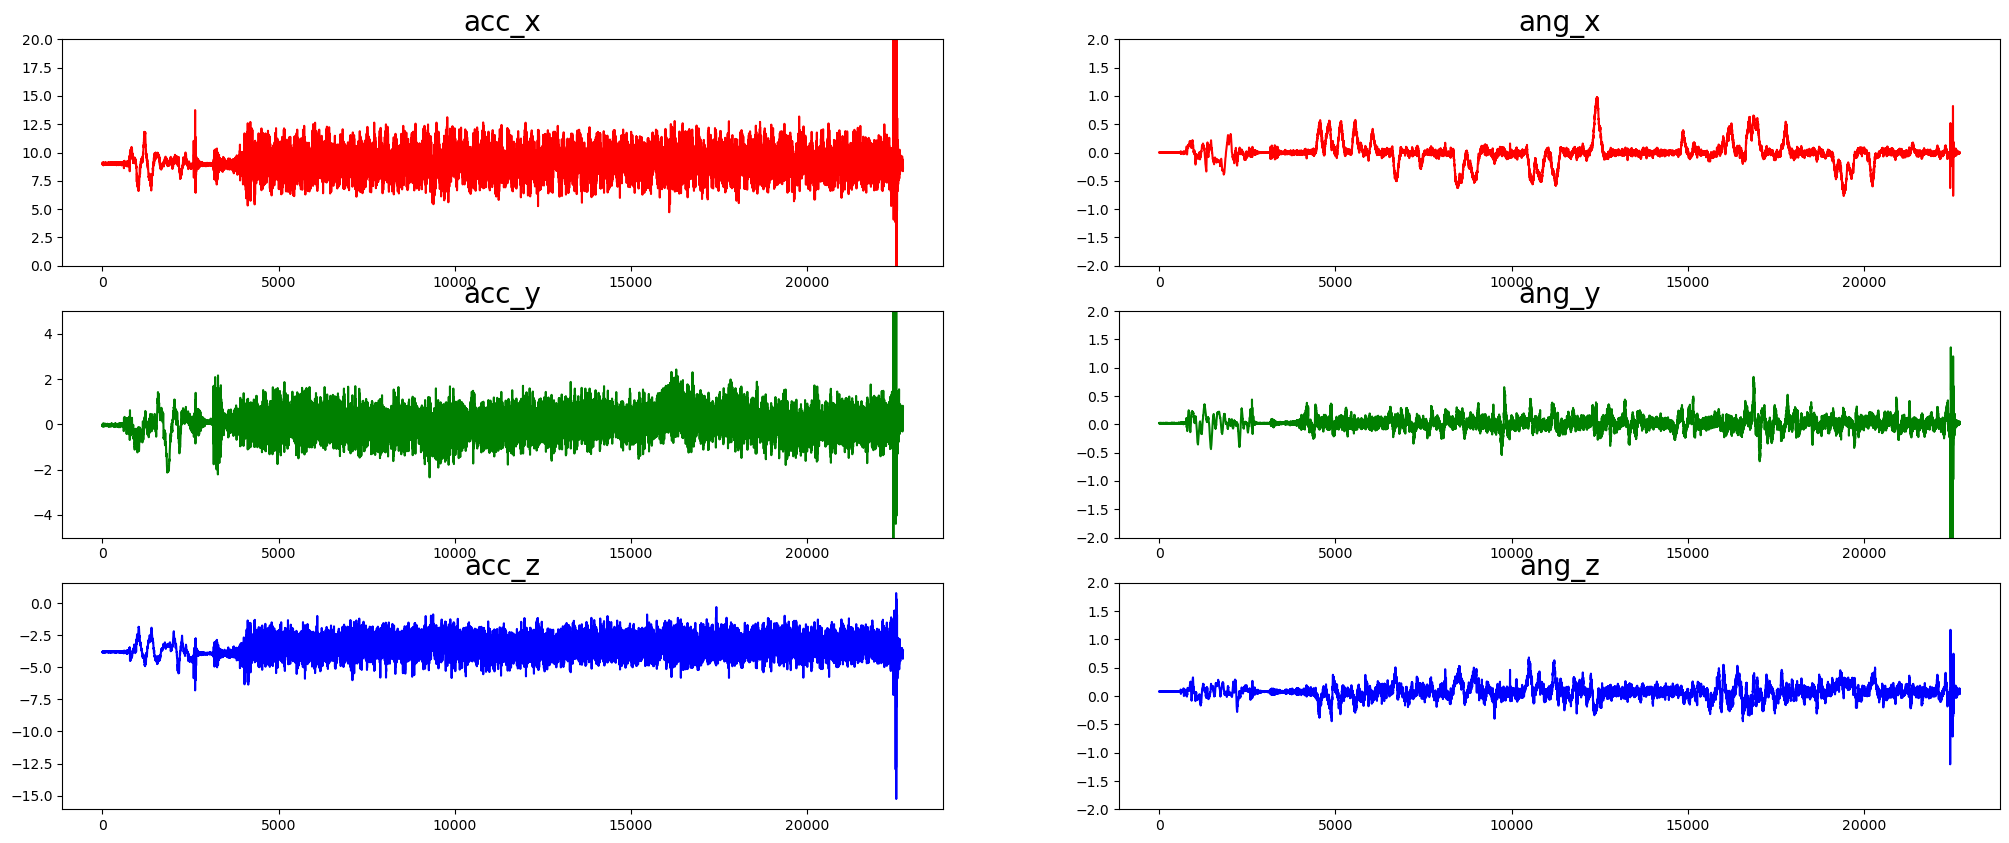

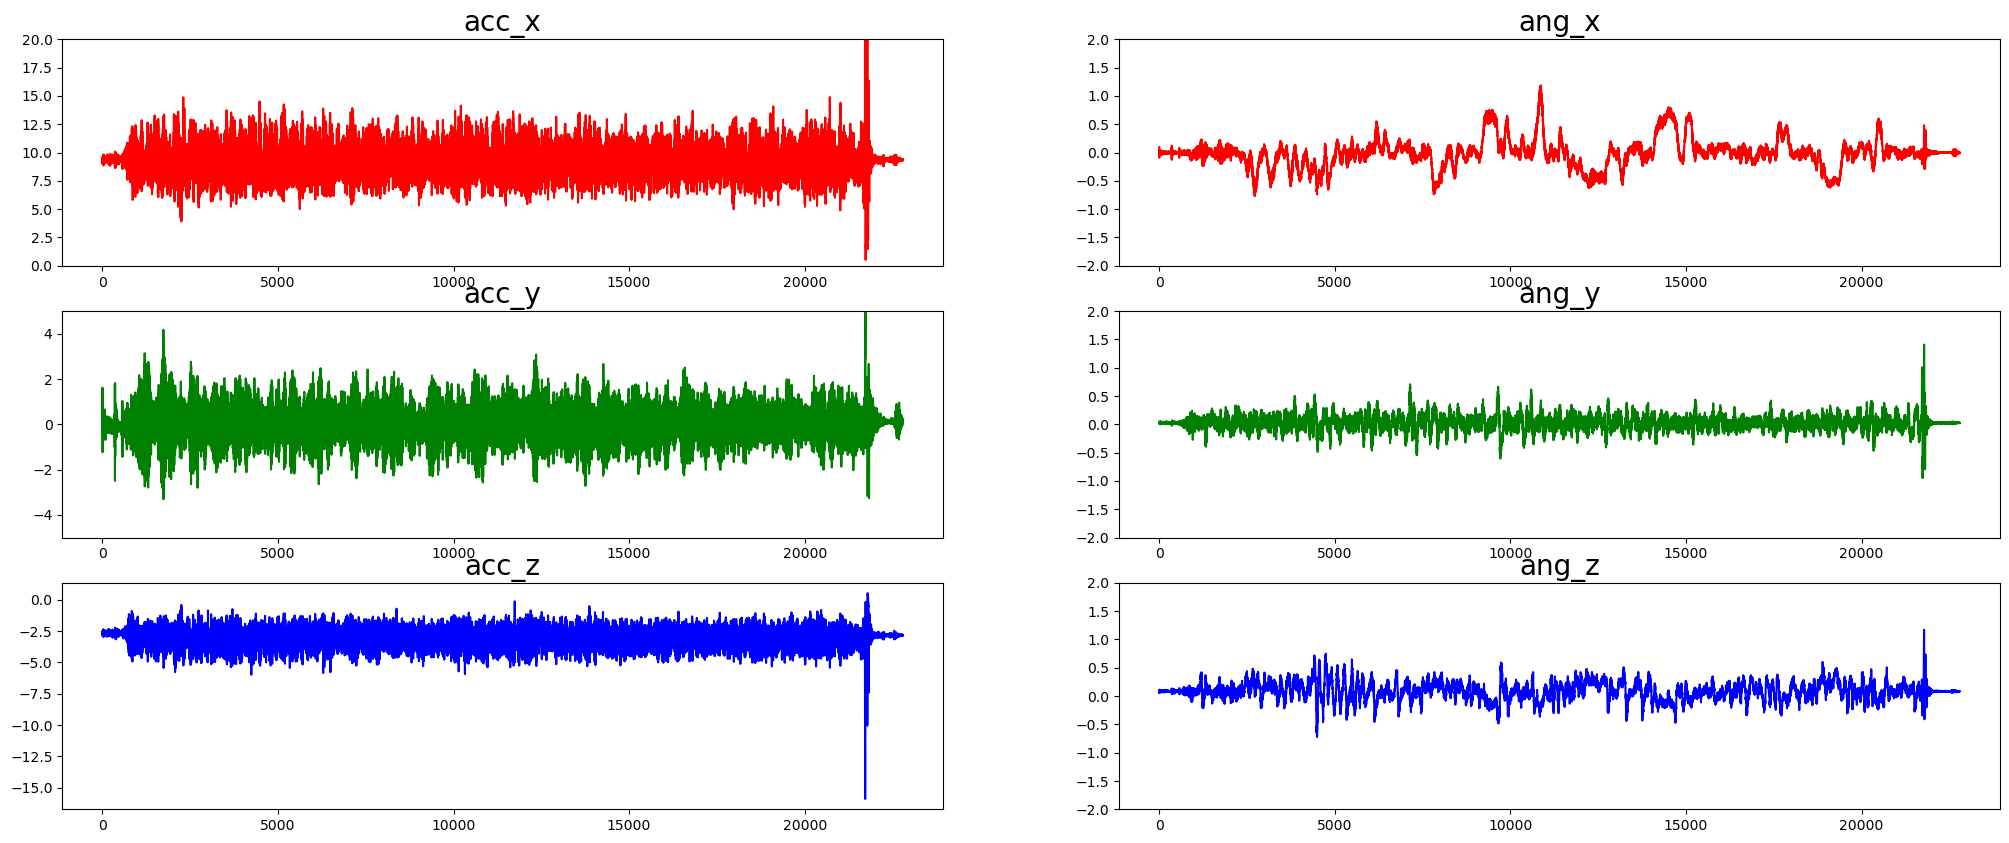

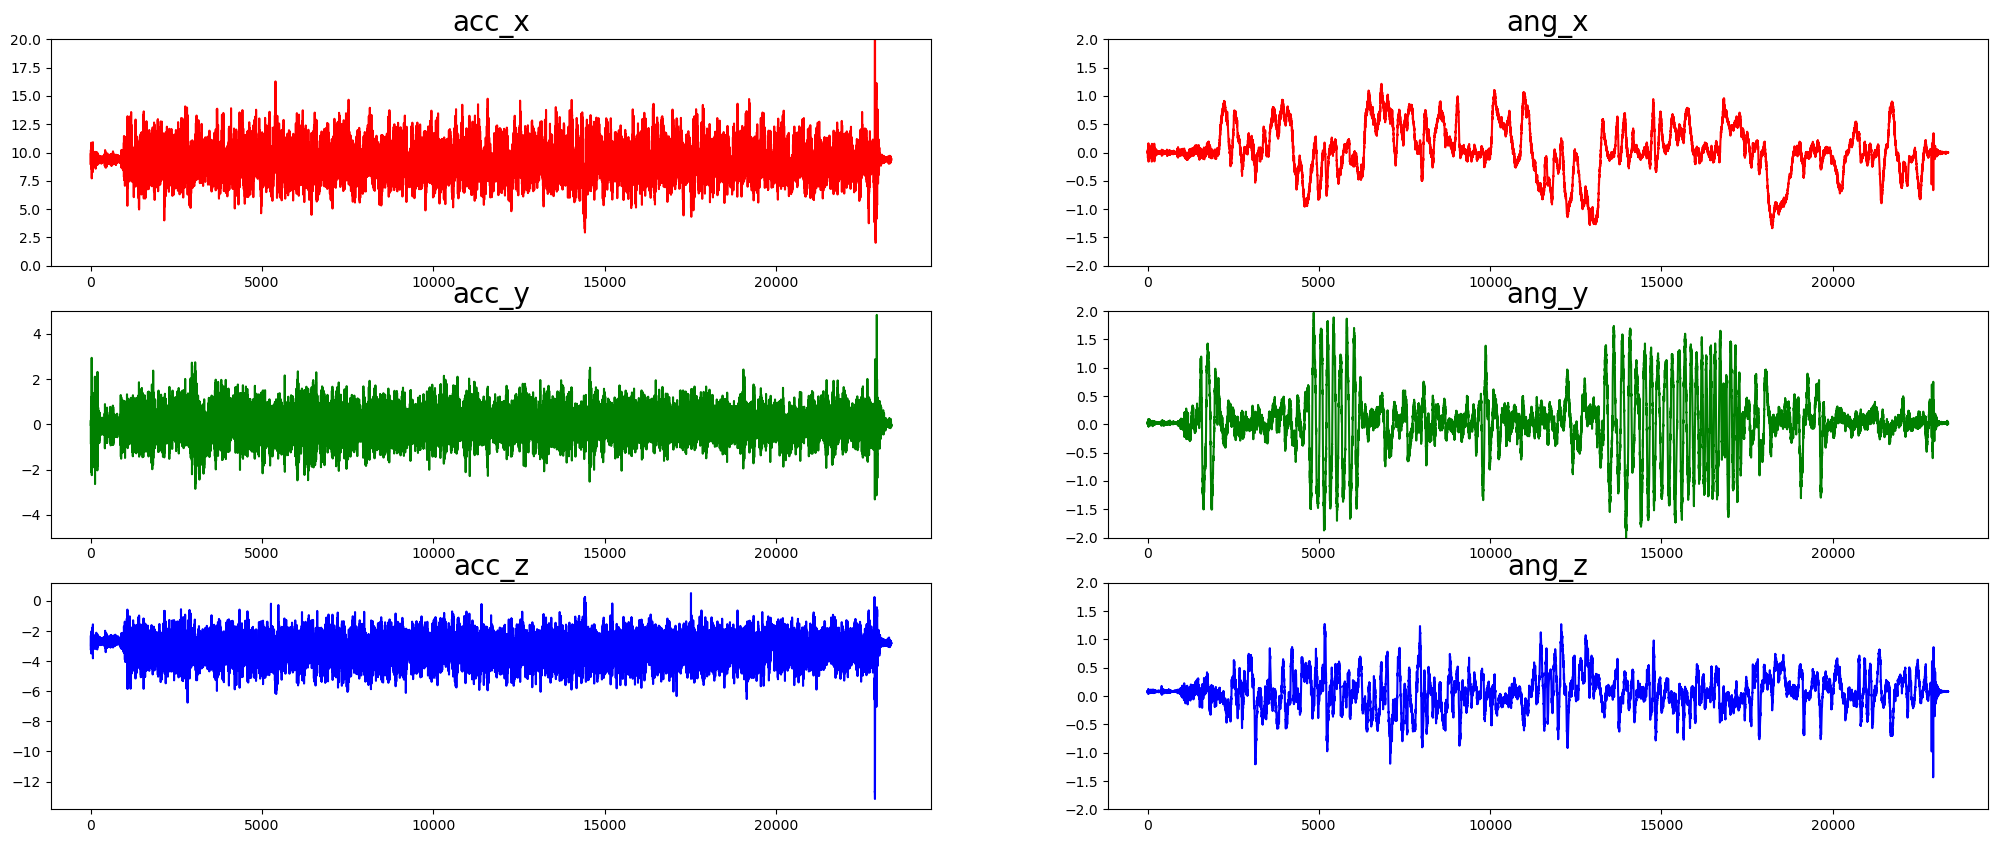

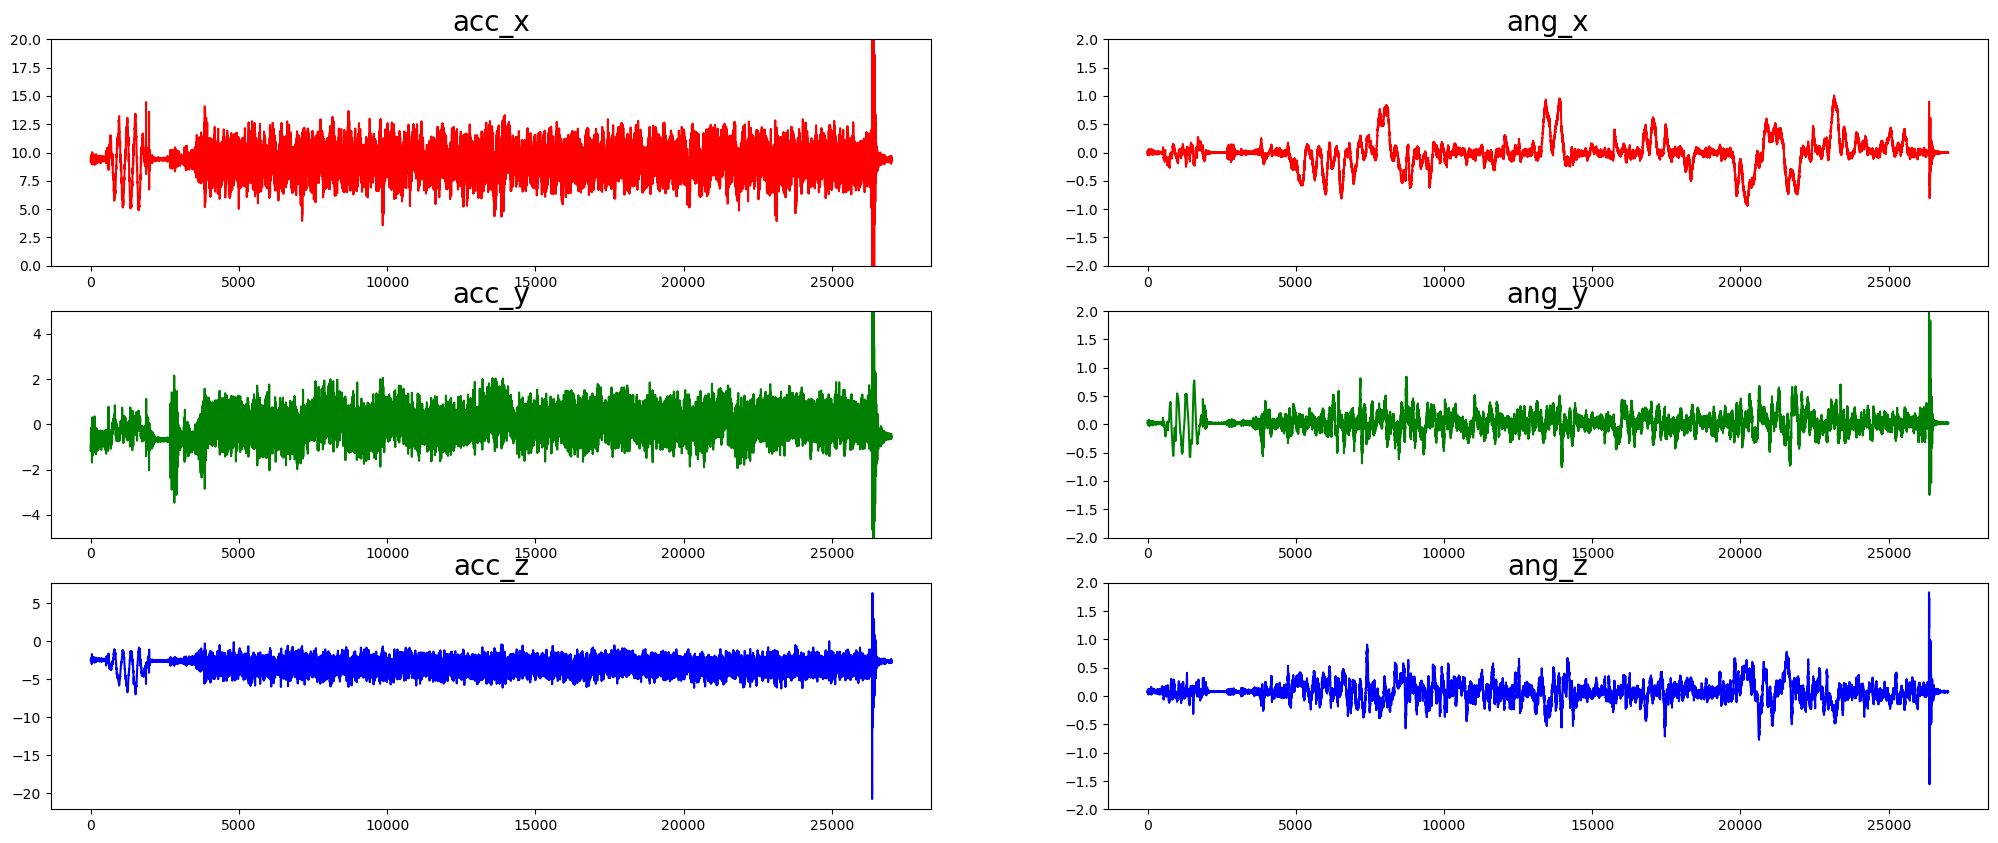

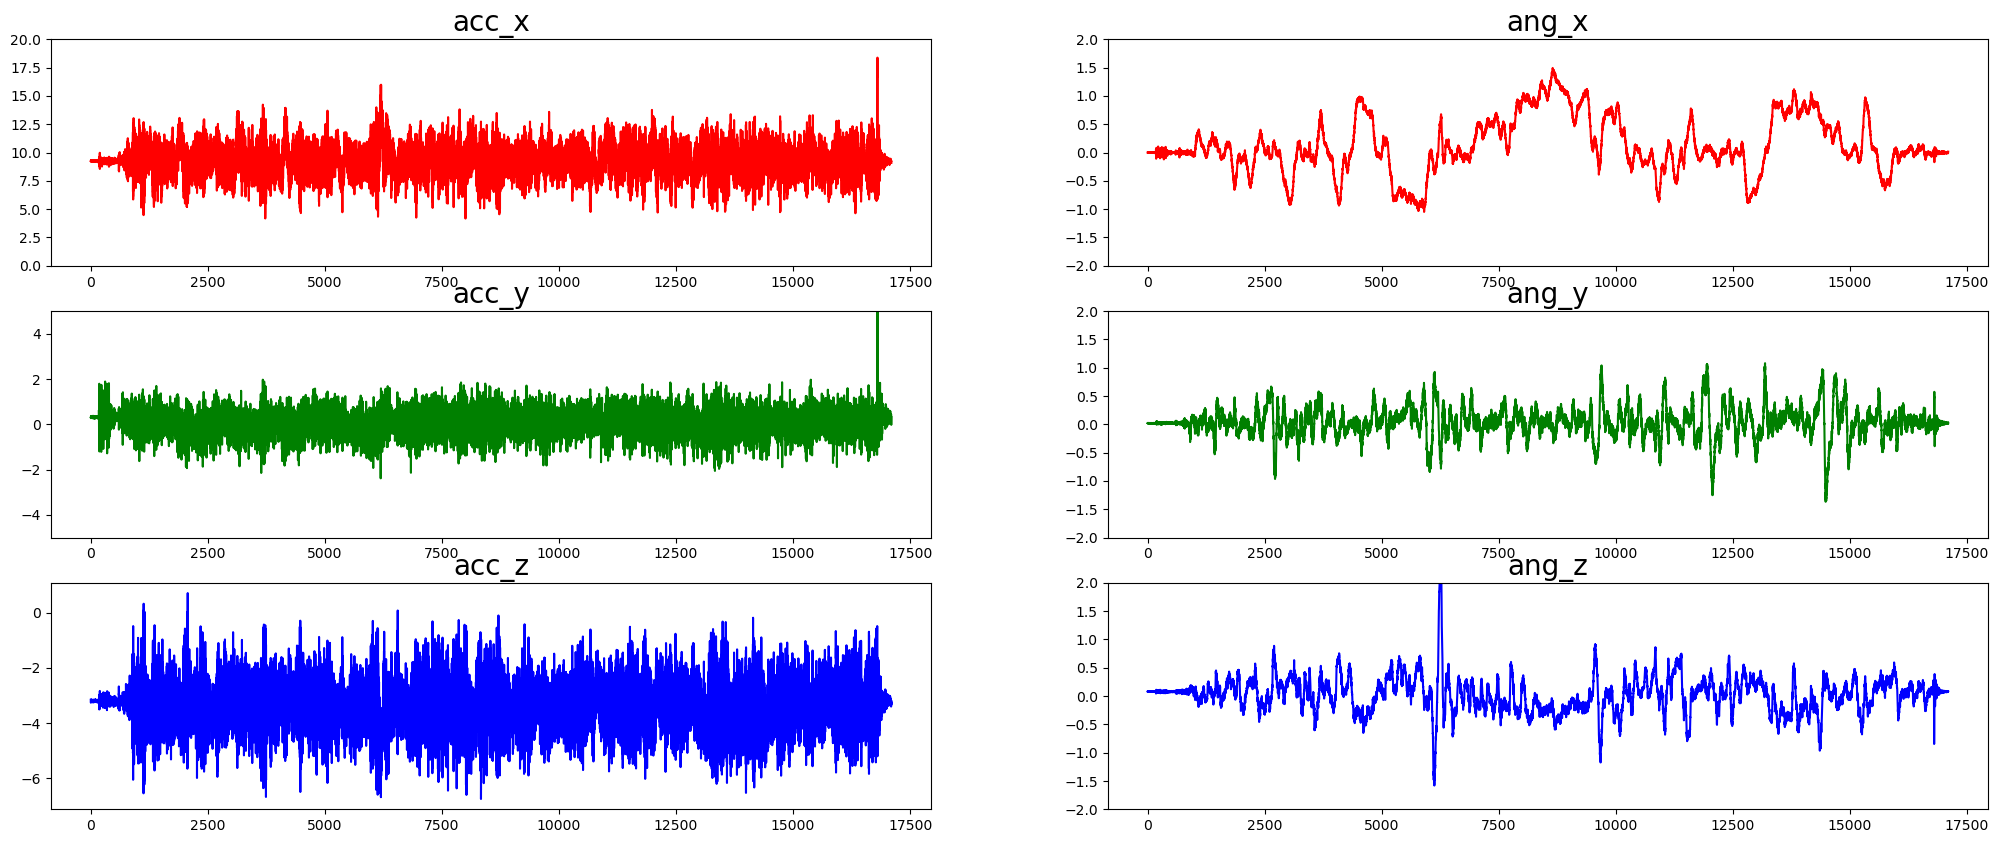

In [13]:
for i in range(6):
    
    plt.figure(figsize = (25,10))
    
    plt.subplot(3,2,1)
    plt.plot(acc_list[i][0], color = 'r')
    plt.title('acc_x', fontsize = 20)
    plt.ylim(0,20)

    plt.subplot(3,2,2)
    plt.plot(gyro_list[i][0], color = 'r')
    plt.title('ang_x', fontsize = 20)
    plt.ylim(-2,2)

    plt.subplot(3,2,3)
    plt.plot(acc_list[i][1], color = 'g')
    plt.title('acc_y', fontsize = 20)
    plt.ylim(-5,5)

    plt.subplot(3,2,4)
    plt.plot(gyro_list[i][1], color = 'g')
    plt.title('ang_y', fontsize = 20)
    plt.ylim(-2,2)

    plt.subplot(3,2,5)
    plt.plot(acc_list[i][2], color = 'b')
    plt.title('acc_z', fontsize = 20)

    plt.subplot(3,2,6)
    plt.plot(gyro_list[i][2], color = 'b')
    plt.title('ang_z', fontsize = 20)
    plt.ylim(-2,2)

    plt.show()

In [ ]:
# # plotting all data on the same axis

# plt.figure(figsize = (10,5))

# plt.subplot(2,2,1)
# plt.plot(acc_list[1][0], 'r', label='acc_x')
# plt.plot(acc_list[1][1], 'g', label='acc_y')
# plt.plot(acc_list[1][2], 'b', label='acc_z')
# plt.legend()
# plt.title('Accelerometer data', fontsize = 20)
# plt.xlabel('# data', fontsize = 20)
# plt.ylabel('Magnitude', fontsize = 20)

# plt.subplot(2,2,2)
# plt.plot(gyro_list[1][0], 'r', label='ang_x')
# plt.plot(gyro_list[1][1], 'g', label='ang_y')
# plt.plot(gyro_list[1][2], 'b', label='ang_z')
# plt.legend()
# plt.title('Gyroscope data', fontsize = 20)
# plt.xlabel('Time', fontsize = 20)
# plt.ylabel('Magnitude', fontsize = 20)